In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
arr=np.array([[1,2,3,4]])
s= sum(arr)

print(arr.shape)
print(s)

(1, 4)
[1 2 3 4]


In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
data = pd.read_csv("DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
scores= data[['DMV_Test_1','DMV_Test_2']].values
results= data['Results'].values
scores.shape

(100, 2)

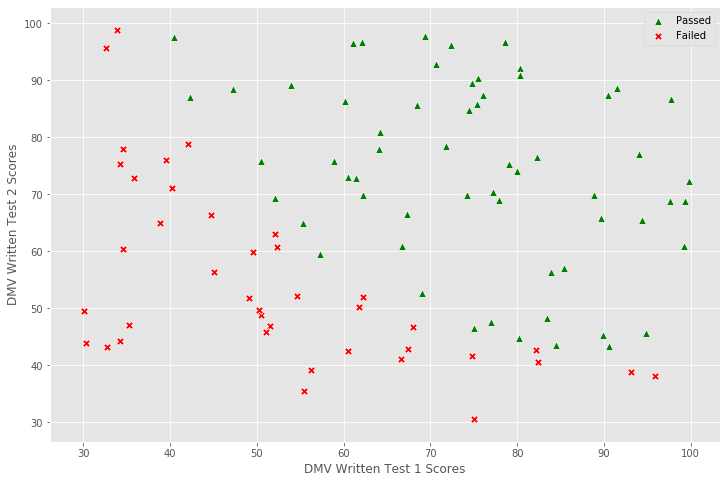

In [7]:
passed= (results==1).reshape(100,1)
failed= (results==0).reshape(100,1)
ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])


plt.show()

In [8]:
#define Sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
sigmoid(0)

0.5

In [10]:

def compute_cost(Y,A,m):
    error = (Y * np.log(A)) + ((1 - Y) * np.log(1 - A))
    cost = -(1 / m ) * np.sum(error)
    return cost


In [11]:
x=scores.T
print("scores dimensions :" ,x.shape)


mean_scores = np.mean(x, axis=1)
std_scores = np.std(x, axis=1)

mean= np.reshape(mean_scores,(2,1))
std=np.reshape(std_scores,(2,1))
print("mean scores dim:", mean.shape)
print("std dim:",std.shape)

X= (x-mean)/std
print("shape of standardized X: ", X.shape)

print(X)
Y= results.reshape(1,100)
print("results dimensions: ", Y.shape)
#results_data

rows = X.shape[0]
                        
#print(rows)

weights=np.zeros((rows,1))
print("weights dimensions:", weights.shape)
print("weights :", weights)
bias=0



scores dimensions : (2, 100)
mean scores dim: (2, 1)
std dim: (2, 1)
shape of standardized X:  (2, 100)
[[-1.60224763 -1.82625564 -1.53903969 -0.28210129  0.69152826 -1.06199728
  -0.23437234  0.4845113   0.53998666  0.97044832  1.56075461  0.48393864
   0.86065022  0.1921582  -1.34839922 -0.60293429  0.17694982  0.11893077
   0.25914553  0.58543944  0.0892403   1.2413042  -0.78042096 -1.62350714
   0.63426559 -0.17423248  0.75131151  1.41886056 -0.19700066 -1.38726847
  -0.22029098  1.02063763 -0.69916396 -0.70239602 -1.31231814 -0.56863523
  -1.63882482 -0.07578684  0.47234786 -1.62497511  0.94305124 -0.72810195
   1.48750373  0.86383711 -0.75392586 -0.17672918  0.59650575  1.65941042
  -0.1844568   1.33883167  0.73863826  1.73693492  1.28623744 -1.60736862
  -0.79324552 -0.82939191  1.65290418 -1.70794943  0.44442728  0.31776703
   0.50366692 -1.56803122 -0.48502704 -1.83802631 -1.08343328  0.04734442
  -1.30092096 -0.85594644  0.75592876  0.05694243 -1.70042734 -0.08289756
   0.346

In [12]:
def gradient_Descent(X,Y,weights,bias,alpha):
    
    Z= np.dot(weights.T,X)+bias
    #print("shape of Z:",Z.shape)
    A= sigmoid(Z)
    dZ=A-Y
    #print("shape of dZ:", dZ.shape)
    #print("shape of A:", A.shape)
    m= X.shape[1]
    #print("Number of data points:", m)
    dW = (1 / m) * np.dot(X, dZ.T)
    #print("shape of dW:", dW.shape)
    db = (1 / m) * np.sum(dZ)
    alpha=0.01
    weights= weights- (alpha*dW)
    #print("dim of updated weights:",weights.shape)
    bias= bias-(alpha*db)
    cost= compute_cost(Y,A,m)
    #print(cost)
    #costs.append(cost)
    
    return weights, bias, cost



In [13]:
alpha=0.7;
iterations=20000;
costs=[]
for i in range(iterations):
    
    weights,bias,cost =gradient_Descent(X,Y,weights,bias,alpha)
    costs.append(cost)
    

print("weights: ",weights)
print("bias",bias)
#print(costs)


weights:  [[3.53998324]
 [3.28717456]]
bias 1.505241897446795


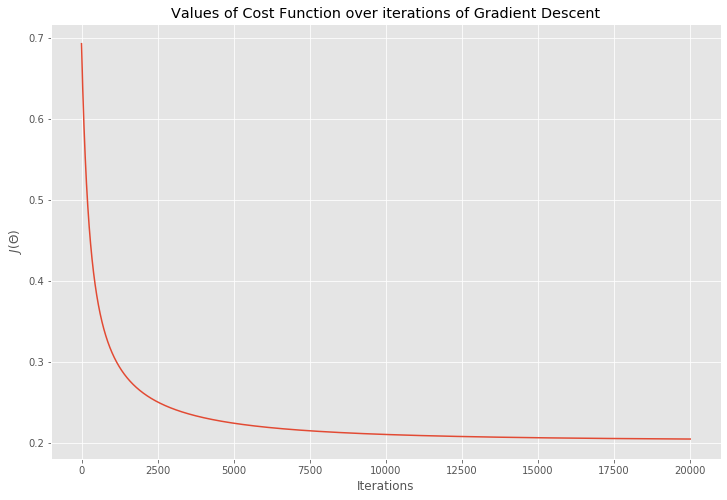

In [14]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

(100, 2)


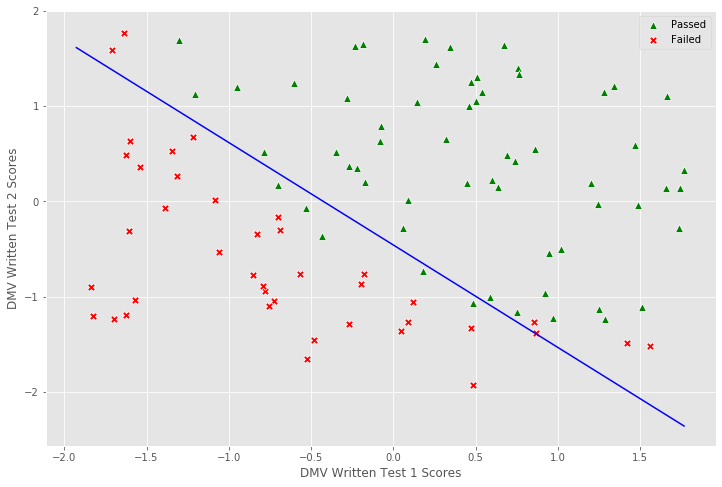

In [15]:
x_plot= X.T
print(x_plot.shape)

passed= (results==1).reshape(100,1)
failed= (results==0).reshape(100,1)


sns.scatterplot(x = x_plot[passed[:, 0], 0],
                y = x_plot[passed[:, 0], 1],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = x_plot[failed[:, 0], 0],
                    y = x_plot[failed[:, 0], 1],
                    marker = "X",
                    color = "red",
                    s = 60)
ax.legend(["Passed", "Failed"])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")



x_boundary = np.array([np.min(x_plot[:, 1]), np.max(x_plot[:, 1])])
y_boundary = -(bias + weights[0] * x_boundary) / weights[1]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();